In [1]:
from springyknn.springyknn import *
from fa2 import ForceAtlas2

%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [2]:
import mnist

from sklearn.decomposition import PCA

data = mnist.train_images()
data = data.reshape(data.shape[0], -1)
target = mnist.train_labels()
print(data.shape)
print(target.shape)
pca = PCA(n_components=100)
MX = pca.fit_transform(data / 255.0)
#MX = data / 255.0
My = target
print('Explained total variation: ,', format(sum(pca.explained_variance_ratio_)))
print(MX.shape)

(60000, 784)
(60000,)
Explained total variation: , 0.9142724556408516
(60000, 100)


In [3]:
springyknn = SpringyKNN(MX, My, randomize=True, num_pivots=5000)
G = springyknn.get_springy_knn_graph(k1=10, k2=20)
springyknn.write_gexf(G, filename='mnist_springyknn_graph.gexf')

Started kNN of data on pivots...
Finished kNN of data on pivots in  38.50646448135376  secs
Started spring strength computation between pivots...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 60000/60000 [00:10<00:00, 5662.48it/s]


Finished spring strength computation in  10.599056005477905  secs
Started kNN graph computation from lil_matrix...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:00<00:00, 18794.82it/s]


Finished kNN graph of pivots in  1.1120078563690186  secs
Preparing networkx graph...
Finished preparing networkx graph in  0.13202905654907227  secs
Saved gexf file


Preparing networkx visualization...
Computing circular layout positions...
Finished computing circular layout positions in  0.003999948501586914  secs
Computing spring layout positions...
Finished computing spring layout positions in  208.27322578430176  secs


<IPython.core.display.Javascript object>


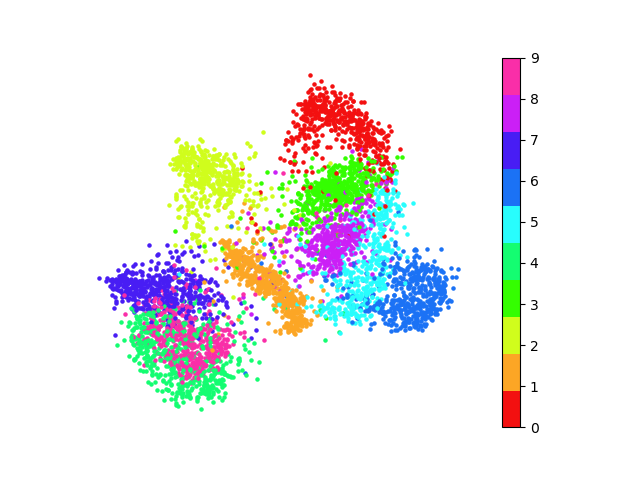

Finished networkx visualization in  221.19023299217224  secs


In [21]:
springyknn.viz_spring_graph(G, dim=2, iterations=150, scale=1.0)

In [ ]:
forceatlas2 = ForceAtlas2(
                          # Behavior alternatives
                          outboundAttractionDistribution=False,  # Dissuade hubs
                          linLogMode=False,  # NOT IMPLEMENTED
                          adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                          edgeWeightInfluence=1.0,

                          # Performance
                          jitterTolerance=1.0,  # Tolerance
                          barnesHutOptimize=True,
                          barnesHutTheta=1.2,
                          multiThreaded=False,  # NOT IMPLEMENTED

                          # Tuning
                          scalingRatio=2.0,
                          strongGravityMode=False,
                          gravity=1.0,

                          # Log
                          verbose=True)

positions = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=500)
fig = nx.draw_networkx_nodes(G, positions, node_color=springyknn.pivots_y, node_size=5, 
                       with_labels=False, alpha=0.5, cmap=plt.cm.tab20, label=springyknn.pivots_y)
sm = plt.cm.ScalarMappable(cmap=fig.get_cmap(), norm=plt.Normalize(vmin=0, vmax=9))
sm.set_array([])
plt.colorbar(sm)
plt.show()

 11%|█████████████████████▉                                                                                                                                                                                 | 55/500 [00:06<00:45,  9.70it/s]